# Benchmarking

In this exercise you will compare a few optimizers on estimagic's built-in benchmark suites. 

## Resources

- [Benchmarking tutorial](https://estimagic.readthedocs.io/en/stable/how_to_guides/optimization/how_to_benchmark_optimization_algorithms.html)
- [API reference](https://estimagic.readthedocs.io/en/stable/reference_guides/index.html#benchmarks)

In [1]:
import estimagic as em

In [2]:
problems = em.get_benchmark_problems(name="example")

In [3]:
optimizers = [
    "scipy_neldermead",
    "nlopt_lbfgs",
    "fides",
    "nag_dfols",
]

## Task 1:

- Use `em.run_benchmark` to run the benchmark
- Use `em.profile_plot` to visualize the results

## Solution 1:

In [4]:
results = em.run_benchmark(problems, optimize_options=optimizers)

/home/tim/sciebo/phd/projects/janos/estimagic/src/estimagic/decorators.py:73: UserWarning: The following exception was caught:

Traceback (most recent call last):
  File "/home/tim/sciebo/phd/projects/janos/estimagic/src/estimagic/decorators.py", line 58, in wrapper_catch
    res = func(*args, **kwargs)
  File "/home/tim/sciebo/phd/projects/janos/estimagic/src/estimagic/batch_evaluators.py", line 127, in internal_func
    return func(*args, **kwargs)
  File "/home/tim/sciebo/phd/projects/janos/estimagic/src/estimagic/optimization/optimize.py", line 397, in minimize
    return _optimize(
  File "/home/tim/sciebo/phd/projects/janos/estimagic/src/estimagic/optimization/optimize.py", line 750, in _optimize
    raw_res = internal_algorithm(**problem_functions, x=x, step_id=step_ids[0])
  File "/home/tim/sciebo/phd/projects/janos/estimagic/src/estimagic/optimization/get_algorithm.py", line 241, in wrapper_add_history_processing
    out = algorithm(**kwargs)
  File "/home/tim/sciebo/phd/proje

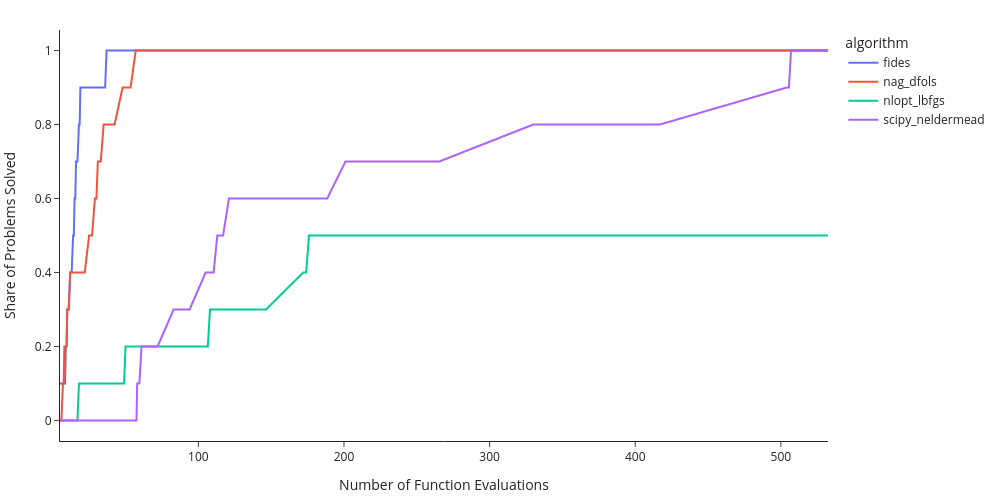

In [5]:
fig = em.profile_plot(problems, results)

fig.update_layout(width=1000, height=500)
fig.show(renderer="png")

## Task 2: 

- Switch to the `estimagic` problem set instead of the `example` problem set. Choose a suitable value for `n_cores` to parallelize on your laptop. Most laptops have at least 2 cores. You won't get any benefit from choosing more cores than you have. 
- Compare `scipy_neldermead` against `nlopt_neldermead`. Spoiler: They are very different!
- Use `em.convergence_plot` to look at individual problems

In [6]:
problems = em.get_benchmark_problems(name="estimagic")

optimizers = ["scipy_neldermead", "nlopt_neldermead"]

In [10]:
results = em.run_benchmark(problems, optimize_options=optimizers, n_cores=2)

/home/tim/sciebo/phd/projects/janos/estimagic/src/estimagic/benchmarking/more_wild.py:198: RuntimeWarning: overflow encountered in exp
  temp_array[2] = np.exp(-x[6] * (temp - x[9]) ** 2)
/home/tim/sciebo/phd/projects/janos/estimagic/src/estimagic/benchmarking/more_wild.py:200: RuntimeWarning: overflow encountered in multiply
  fvec = y - (temp_array.T * x[:4]).T.sum(axis=0)
/home/tim/sciebo/phd/projects/janos/estimagic/src/estimagic/benchmarking/get_benchmark_problems.py:258: RuntimeWarning: overflow encountered in matmul
  "value": noisy_critval @ noisy_critval,
/home/tim/sciebo/phd/projects/janos/estimagic/src/estimagic/benchmarking/more_wild.py:198: RuntimeWarning: overflow encountered in exp
  temp_array[2] = np.exp(-x[6] * (temp - x[9]) ** 2)
/home/tim/sciebo/phd/projects/janos/estimagic/src/estimagic/benchmarking/more_wild.py:199: RuntimeWarning: overflow encountered in exp
  temp_array[3] = np.exp(-x[7] * (temp - x[10]) ** 2)
/home/tim/sciebo/phd/projects/janos/estimagic/src/es

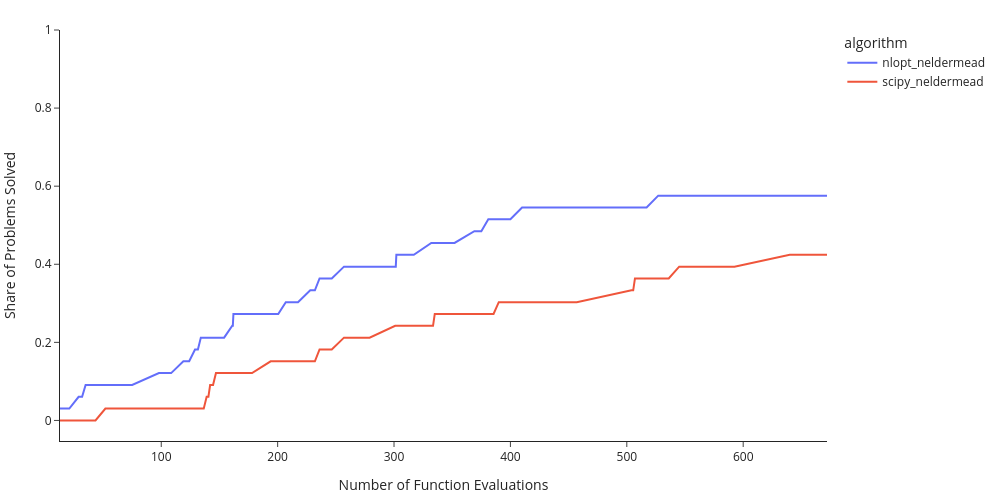

In [8]:
fig = em.profile_plot(problems, results)

fig.update_layout(width=1000, height=500)
fig.show(renderer="png")

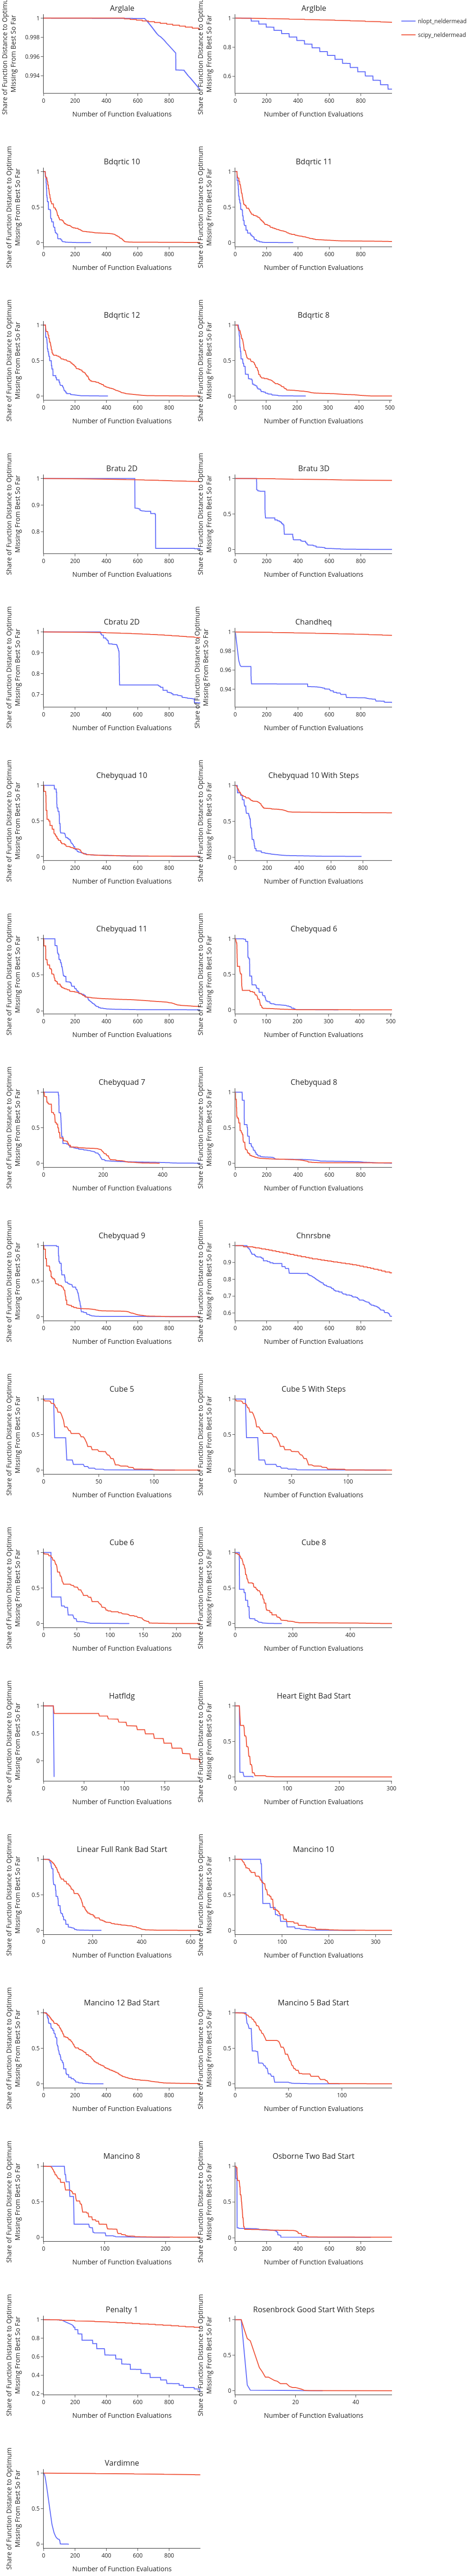

In [9]:
fig = em.convergence_plot(problems, results)
fig.show(renderer="png")